In [1]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

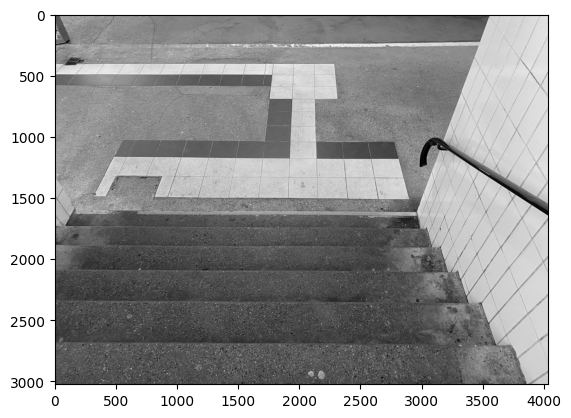

In [113]:
img = cv2.imread("/Users/hendricpopma/Documents/Uni/Uni_6_Sem/Bums/project_bums/Test_Bilder/IMG_7553.jpeg", 0 )
plt.gray()

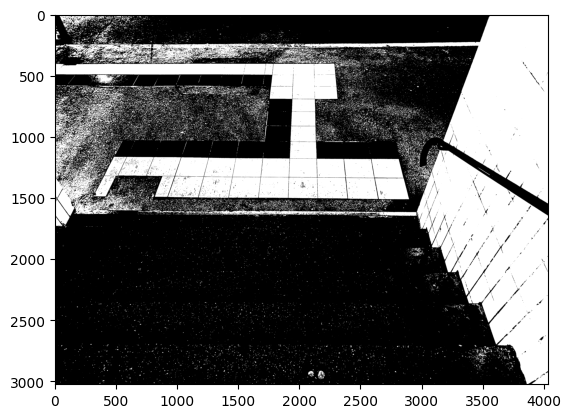

In [139]:
gauss = cv2.GaussianBlur(img, None, 30)
plt.imshow(gauss)
t, seg = cv2.threshold(img,150,1,cv2.THRESH_BINARY) #streifen = 200
plt.imshow(seg)

1134488.0

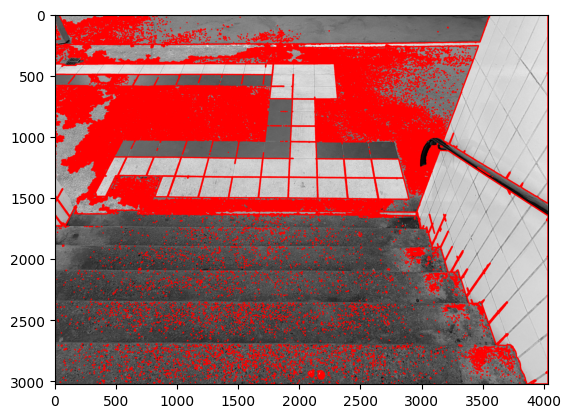

In [158]:
cnts, hierachy = cv2.findContours(seg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
out = cv2.merge((img, img, img))

cv2.drawContours(out, cnts, -1, [255,0,0], 10)
plt.imshow(out)
area = []
for cnt in cnts:
    area.append(cv2.contourArea(cnt))
max(area)
    

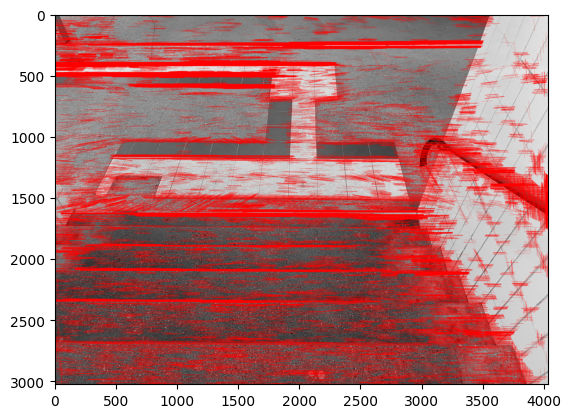

In [132]:
derx=cv2.Sobel(gauss, cv2.CV_32F, 1, 0, ksize=1)
dery=cv2.Sobel(gauss, cv2.CV_32F, 0, 1, ksize=1)
gradmag=np.sqrt(derx**2 + dery**2)
plt.imshow(gradmag)
gradmag_w = (gradmag).astype('uint8')
linesh = cv2.HoughLinesP(gradmag_w, 1, np.pi/180, 60,
                        minLineLength=100, maxLineGap=10)

lines=np.squeeze(linesh)
img_rgb = cv2.merge((img, img, img))
for (x1,y1,x2,y2) in lines:
    cv2.line(img_rgb, (x1,y1), (x2,y2), (255,0,0))
plt.imshow(img_rgb)

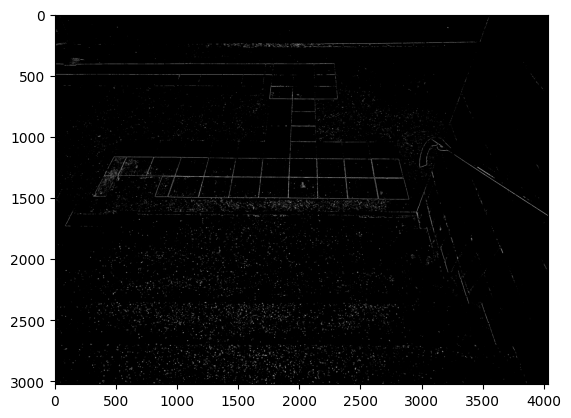

In [60]:
derx=cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
dery=cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
gradmag=np.sqrt(derx**2 + dery**2)
plt.imshow(gradmag > 80)
gradmag_w = (gradmag > 80).astype('uint8')

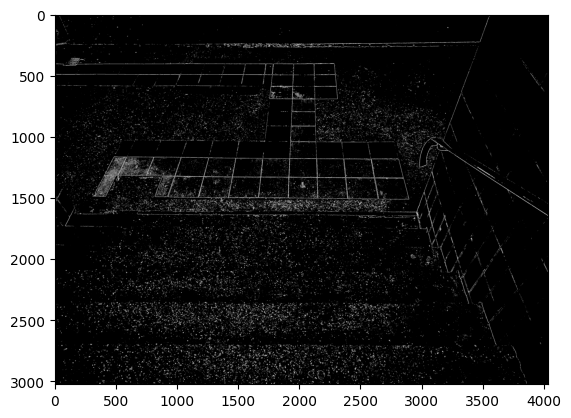

In [56]:
derx=cv2.Sobel(img, cv2.CV_32F, 1, 0,)
dery=cv2.Sobel(img, cv2.CV_32F, 0, 1,)
gradmag=np.sqrt(derx**2 + dery**2)
plt.imshow(gradmag > 200)
gradmag_w = (gradmag > 200).astype('uint8')

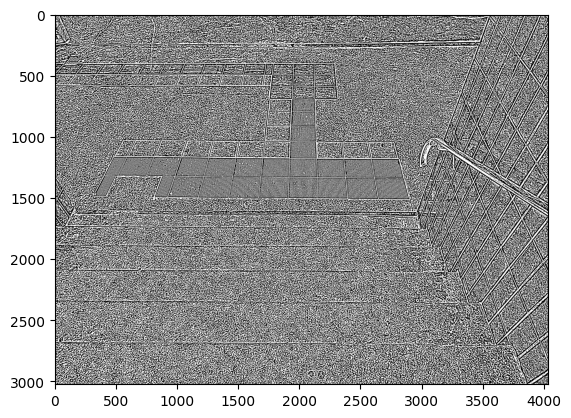

In [55]:
lapl = cv2.Laplacian(img, cv2.CV_16S,ksize=29)
plt.imshow(lapl > 500)

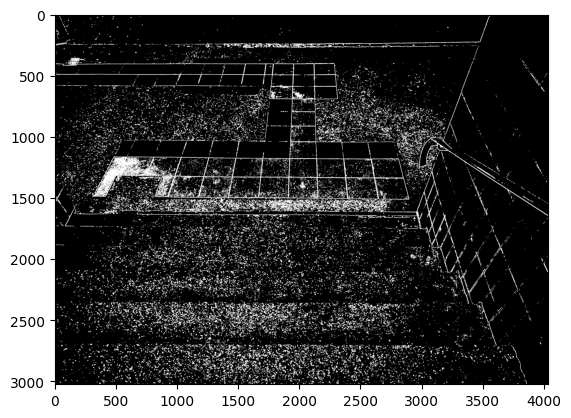

In [39]:
gradmag_w2 = cv2.dilate(gradmag_w, np.ones((3,3)), iterations=1) #7
plt.imshow(gradmag_w2)

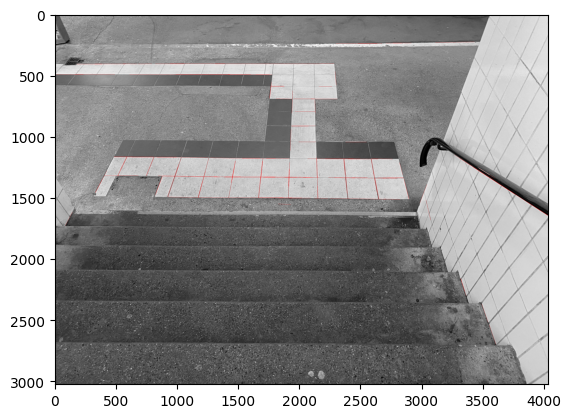

In [61]:
linesh = cv2.HoughLinesP(gradmag_w, 1, np.pi/180, 60,
                        minLineLength=100, maxLineGap=10)

lines=np.squeeze(linesh)
img_rgb = cv2.merge((img, img, img))
for (x1,y1,x2,y2) in lines:
    cv2.line(img_rgb, (x1,y1), (x2,y2), (255,0,0))
plt.imshow(img_rgb)

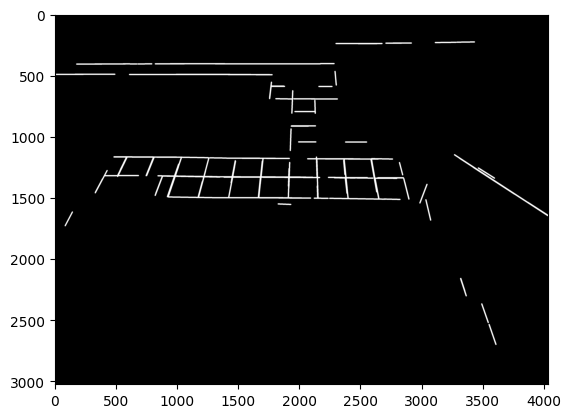

In [67]:
black = np.zeros(np.shape(img), dtype='uint8')
for (x1, y1, x2, y2) in lines: 
    cv2.line(black, (x1,y1), (x2,y2), (255,255,255), thickness=10)
plt.imshow(black)

In [112]:
lines_to_plot = lines[0][0:2] + lines[0][2:4]
#cv2.fillPoly(black, pts=[lines_to_plot], color=(255,255,255))
lines_to_plot

array([[1878,  814]], dtype=int32)

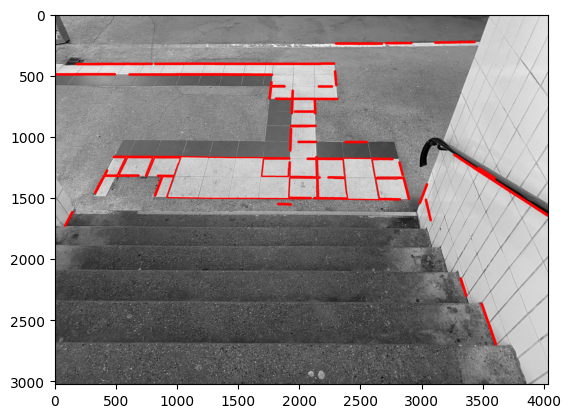

In [71]:
cnts, hierachy = cv2.findContours(black, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
out = cv2.merge((img, img, img))
cv2.drawContours(out, cnts, -1, [255,0,0], 10)
plt.imshow(out)
